# Cross-Check nationality API data with Ancestry data #2

**Goal**: determine how to group nationalities into ethnic/cultural clumps

**Method**: for example, look for all the German results in Ancestry and see what values showed up in API, and vice versa. this will give us a better understanding about how we should be grouping values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('1913TrowBus_nationalityAPI.csv')
df.head(1)

,Year,PG,ID,ID2,CAT_ORG,FULL,Position,Nation,Name,NATIONALITY,...,ST Name 2,ST Name 3,ST Name 4,ST Name 5,ST Name 6,First,Last,country1_api,country2_api,origin_api
0,1913_TrowBusMan,904,33,1913_TrowBusMan_33,Restaurants,"Albanian Roumanian Co, 261 W37th",23,NaN,Albanian Roumanian Co,Albanian,...,W37th,NaN,NaN,NaN,NaN,Roumanian,Albanian,Romania,Iran,NaN


## Check Ancestry results in common API values

E.g. look for all "German" values in API column and see what values show up Ancestry results

In [4]:
df['country1_api'].value_counts()[:20]

Ireland           1064
Germany            971
United Kingdom     690
France             406
Israel             375
Italy              329
Switzerland        227
Spain              138
Austria            133
cannot use api     105
Greece             104
South Africa        79
error               72
Liberia             66
Sweden              62
Kenya               47
Netherlands         37
Indonesia           34
Ghana               33
Denmark             29
Name: country1_api, dtype: int64

## 1. Ireland

In [8]:
IrelandAPI = df[df['country1_api']=='Ireland']
IrelandAPI.head(1)

,Year,PG,ID,ID2,CAT_ORG,FULL,Position,Nation,Name,NATIONALITY,...,ST Name 2,ST Name 3,ST Name 4,ST Name 5,ST Name 6,First,Last,country1_api,country2_api,origin_api
4,1913_TrowBusMan,906,430,1913_TrowBusMan_430,Restaurants,"Cafe Safran, 265, 4th av",13,NaN,Cafe Safran,Armenian,...,4th,av,NaN,NaN,NaN,Safran,Cafe,Ireland,Turkey,NaN


In [9]:
IrelandAPI['NATIONALITY final'].value_counts()[:10]

British      242
German       133
Unknown       97
Jewish        91
Irish         55
Scottish      17
Polish        17
Italian        9
Chinese        9
Hungarian      8
Name: NATIONALITY final, dtype: int64

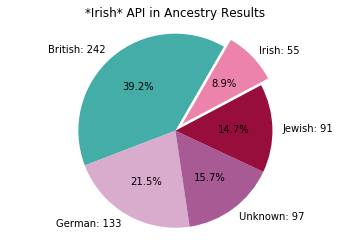

In [13]:
text = '*Irish* API in Ancestry Results'

labels = ['British: 242', 'German: 133', 'Unknown: 97', 'Jewish: 91', 'Irish: 55']
sizes = [242, 133, 97, 91, 55]
explode = [0, 0, 0, 0, 0.1]
colors = ['#45ada8', '#d9acce', '#a75a94', '#970e3c', '#ec83aa']

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, 
       autopct='%1.1f%%', startangle=60)
ax.axis('equal')

plt.title(text)
plt.savefig(f'plots/{text}.png')

## 2. Germany

In [5]:
GermanAPI = df[df['country1_api']=='Germany']
GermanAPI.head(1)

,Year,PG,ID,ID2,CAT_ORG,FULL,Position,Nation,Name,NATIONALITY,...,ST Name 2,ST Name 3,ST Name 4,ST Name 5,ST Name 6,First,Last,country1_api,country2_api,origin_api
8,1913_TrowBusMan,908,1138,1913_TrowBusMan_1138,Restaurants,"Fuchs Meyer, 219 W30th",13,NaN,Fuchs Meyer,Austrian,...,W30th,NaN,NaN,NaN,NaN,Meyer,Fuchs,Germany,Switzerland,NaN


In [6]:
GermanAPI['NATIONALITY final'].value_counts()[:10]

German      324
Jewish      171
British      36
Swiss        11
Polish       10
Dutch         7
Greek         6
Unknown       4
Irish         4
Austrian      4
Name: NATIONALITY final, dtype: int64

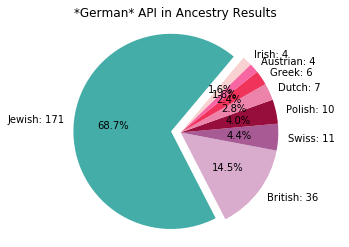

In [7]:
text = '*German* API in Ancestry Results'

labels = ['Jewish: 171', 'British: 36', 'Swiss: 11', 'Polish: 10', 'Dutch: 7', 'Greek: 6', 'Austrian: 4', 'Irish: 4']
sizes = [171, 36, 11, 10, 7, 6, 4, 4]
explode = [0.1, 0, 0, 0, 0, 0, 0, 0]
colors = ['#45ada8', '#d9acce', '#a75a94', '#970e3c', '#ec83aa', '#ef335a', '#f765a3', '#f9d1d1']

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, 
       autopct='%1.1f%%', startangle=50)
ax.axis('equal')

plt.title(text)
plt.savefig(f'plots/{text}.png')

## 3. United Kingdom

In [14]:
UkAPI = df[df['country1_api']=='United Kingdom']
UkAPI.head(1)

,Year,PG,ID,ID2,CAT_ORG,FULL,Position,Nation,Name,NATIONALITY,...,ST Name 2,ST Name 3,ST Name 4,ST Name 5,ST Name 6,First,Last,country1_api,country2_api,origin_api
24,1913_TrowBusMan,912,2229,1913_TrowBusMan_2229,Restaurants,"Merchants Vienna Cafe &. Restaurant, 8 W17th",37,NaN,Merchants Vienna Cafe & Restaurant,Austrian,...,W17th,NaN,NaN,NaN,NaN,Vienna,Merchants,United Kingdom,Belgium,NaN


In [15]:
UkAPI['NATIONALITY final'].value_counts()[:10]

British     186
Unknown      96
German       58
Jewish       48
Scottish     10
Greek         8
Italian       4
Austrian      2
Chinese       2
Russian       2
Name: NATIONALITY final, dtype: int64

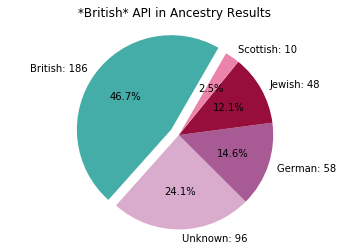

In [18]:
text = '*British* API in Ancestry Results'

labels = ['British: 186', 'Unknown: 96', 'German: 58', 'Jewish: 48', 'Scottish: 10']
sizes = [186, 96, 58, 48, 10]
explode = [0.1, 0, 0, 0, 0]
colors = ['#45ada8', '#d9acce', '#a75a94', '#970e3c', '#ec83aa']

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, 
       autopct='%1.1f%%', startangle=60)
ax.axis('equal')

plt.title(text)
plt.savefig(f'plots/{text}.png')

## 4. France

In [19]:
FranceAPI = df[df['country1_api']=='France']
FranceAPI.head(1)

,Year,PG,ID,ID2,CAT_ORG,FULL,Position,Nation,Name,NATIONALITY,...,ST Name 2,ST Name 3,ST Name 4,ST Name 5,ST Name 6,First,Last,country1_api,country2_api,origin_api
17,1913_TrowBusMan,911,1909,1913_TrowBusMan_1909,Restaurants,"Landau & Donnenfeld, 217 E Houston",21,NaN,Landau & Donnenfeld,Austrian,...,E,Houston,NaN,NaN,NaN,&,Landau,France,Germany,NaN


In [20]:
FranceAPI['NATIONALITY final'].value_counts()[:10]

German     46
Unknown    24
British    24
French     24
Italian    22
Greek      21
Jewish     16
Polish      4
Spanish     3
Chinese     3
Name: NATIONALITY final, dtype: int64

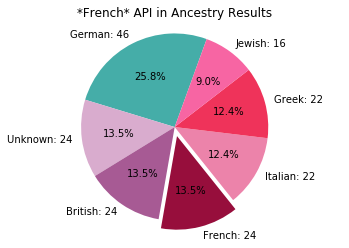

In [23]:
text = '*French* API in Ancestry Results'

labels = ['German: 46', 'Unknown: 24', 'British: 24', 'French: 24', 'Italian: 22', 'Greek: 22', 'Jewish: 16']
sizes = [46, 24, 24, 24, 22, 22, 16]
explode = [0, 0, 0, 0.1, 0, 0, 0]
colors = ['#45ada8', '#d9acce', '#a75a94', '#970e3c', '#ec83aa', '#ef335a', '#f765a3']

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, 
       autopct='%1.1f%%', startangle=70)
ax.axis('equal')

plt.title(text)
plt.savefig(f'plots/{text}.png')

## 5. Israel

In [24]:
IsraelAPI = df[df['country1_api']=='Israel']
IsraelAPI.head(1)

,Year,PG,ID,ID2,CAT_ORG,FULL,Position,Nation,Name,NATIONALITY,...,ST Name 2,ST Name 3,ST Name 4,ST Name 5,ST Name 6,First,Last,country1_api,country2_api,origin_api
2,1913_TrowBusMan,908,1124,1913_TrowBusMan_1124,Restaurants,"Frese Ida L, 2 W33d",13,NaN,Frese Ida L,"American, German",...,W33d,NaN,NaN,NaN,NaN,Ida,Frese,Israel,Italy,NaN


In [25]:
IsraelAPI['NATIONALITY final'].value_counts()[:10]

Jewish      201
German       60
Polish       23
Russian       6
French        3
British       3
Unknown       3
Romanian      2
Austrian      2
Greek         2
Name: NATIONALITY final, dtype: int64

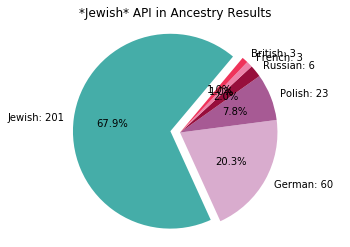

In [30]:
text = '*Jewish* API in Ancestry Results'

labels = ['Jewish: 201', 'German: 60', 'Polish: 23', 'Russian: 6', 'French: 3', 'British: 3']
sizes = [201, 60, 23, 6, 3, 3]
explode = [0.1, 0, 0, 0, 0, 0]
colors = ['#45ada8', '#d9acce', '#a75a94', '#970e3c', '#ec83aa', '#ef335a']

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, 
       autopct='%1.1f%%', startangle=50)
ax.axis('equal')

plt.title(text)
plt.savefig(f'plots/{text}.png')

## 6. Italy

In [31]:
ItalyAPI = df[df['country1_api']=='Italy']
ItalyAPI.head(1)

,Year,PG,ID,ID2,CAT_ORG,FULL,Position,Nation,Name,NATIONALITY,...,ST Name 2,ST Name 3,ST Name 4,ST Name 5,ST Name 6,First,Last,country1_api,country2_api,origin_api
27,1913_TrowBusMan,916,3460,1913_TrowBusMan_3460,Restaurants,"Vienna Cafe & Restaurant, 15 E33d",26,NaN,Vienna Cafe & Restaurant,Austrian,...,E33d,NaN,NaN,NaN,NaN,Cafe,Vienna,Italy,Spain,NaN


In [32]:
ItalyAPI['NATIONALITY final'].value_counts()[:10]

Italian     247
French       10
Spanish      10
British       7
Chinese       5
Greek         4
German        3
Unknown       3
Austrian      2
Jewish        1
Name: NATIONALITY final, dtype: int64

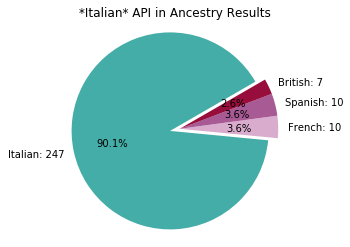

In [35]:
text = '*Italian* API in Ancestry Results'

labels = ['Italian: 247', 'French: 10', 'Spanish: 10', 'British: 7']
sizes = [247, 10, 10, 7]
explode = [0.1, 0, 0, 0]
colors = ['#45ada8', '#d9acce', '#a75a94', '#970e3c']

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, 
       autopct='%1.1f%%', startangle=30)
ax.axis('equal')

plt.title(text)
plt.savefig(f'plots/{text}.png')

## 7. Switzerland

In [37]:
SwissAPI = df[df['country1_api']=='Switzerland']
SwissAPI.head(1)

,Year,PG,ID,ID2,CAT_ORG,FULL,Position,Nation,Name,NATIONALITY,...,ST Name 2,ST Name 3,ST Name 4,ST Name 5,ST Name 6,First,Last,country1_api,country2_api,origin_api
7,1913_TrowBusMan,908,1126,1913_TrowBusMan_1126,Restaurants,"Freysinger Charles, 13 N Moore",20,NaN,Freysinger Charles,Austrian,...,N,Moore,NaN,NaN,NaN,Charles,Freysinger,Switzerland,Ireland,NaN


In [38]:
SwissAPI['NATIONALITY final'].value_counts()[:10]

German       93
Jewish       22
British       8
Dutch         4
Unknown       4
Swiss         3
Austrian      3
French        1
Hungarian     1
Scottish      1
Name: NATIONALITY final, dtype: int64

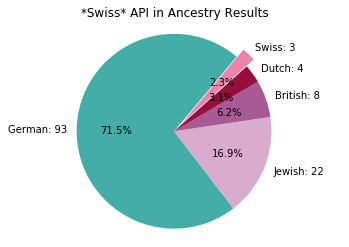

In [39]:
text = '*Swiss* API in Ancestry Results'

labels = ['German: 93', 'Jewish: 22', 'British: 8', 'Dutch: 4', 'Swiss: 3']
sizes = [93, 22, 8, 4, 3]
explode = [0, 0, 0, 0, 0.1]
colors = ['#45ada8', '#d9acce', '#a75a94', '#970e3c', '#ec83aa']

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, 
       autopct='%1.1f%%', startangle=50)
ax.axis('equal')

plt.title(text)
plt.savefig(f'plots/{text}.png')

## 8. Spain

In [40]:
SpainAPI = df[df['country1_api']=='Spain']
SpainAPI.head(1)

,Year,PG,ID,ID2,CAT_ORG,FULL,Position,Nation,Name,NATIONALITY,...,ST Name 2,ST Name 3,ST Name 4,ST Name 5,ST Name 6,First,Last,country1_api,country2_api,origin_api
37,1913_TrowBusMan,904,11,1913_TrowBusMan_11,Restaurants,Abingdon Hotel. 7 Abingdon sq. Tel Chelsea 2300,16,NaN,Abingdon Hotel,British,...,Abingdon,sq,NaN,NaN,NaN,Hotel,Abingdon,Spain,Benin,NaN


In [41]:
SpainAPI['NATIONALITY final'].value_counts()[:10]

Unknown    27
Italian    26
Spanish    13
German      6
British     6
French      4
Greek       4
Jewish      4
Chinese     2
Swiss       1
Name: NATIONALITY final, dtype: int64

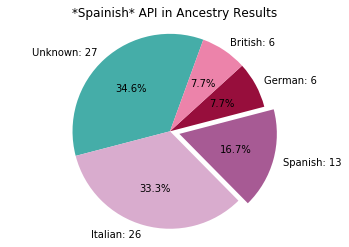

In [45]:
text = '*Spainish* API in Ancestry Results'

labels = ['Unknown: 27', 'Italian: 26', 'Spanish: 13', 'German: 6', 'British: 6']
sizes = [27, 26, 13, 6, 6]
explode = [0, 0, 0.1, 0, 0]
colors = ['#45ada8', '#d9acce', '#a75a94', '#970e3c', '#ec83aa']

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, 
       autopct='%1.1f%%', startangle=70)
ax.axis('equal')

plt.title(text)
plt.savefig(f'plots/{text}.png')

## 9. Austria

In [46]:
AustriaAPI = df[df['country1_api']=='Austria']
AustriaAPI.head(1)

,Year,PG,ID,ID2,CAT_ORG,FULL,Position,Nation,Name,NATIONALITY,...,ST Name 2,ST Name 3,ST Name 4,ST Name 5,ST Name 6,First,Last,country1_api,country2_api,origin_api
29,1913_TrowBusMan,911,2056,1913_TrowBusMan_2056,Restaurants,Lorber Adolph. 1420 Bway,15,NaN,Lorber Adolph,Austrian/German,...,Bway,NaN,NaN,NaN,NaN,Adolph,Lorber,Austria,Germany,NaN


In [47]:
AustriaAPI['NATIONALITY final'].value_counts()[:10]

German      48
Jewish      19
British      5
Unknown      2
Dutch        2
Greek        2
Polish       2
French       1
Austrian     1
Name: NATIONALITY final, dtype: int64

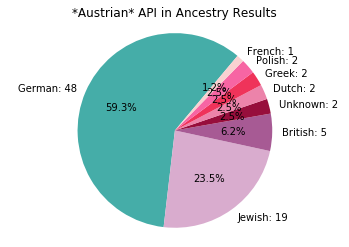

In [48]:
text = '*Austrian* API in Ancestry Results'

labels = ['German: 48', 'Jewish: 19', 'British: 5', 'Unknown: 2', 'Dutch: 2', 'Greek: 2', 'Polish: 2', 'French: 1']
sizes = [48, 19, 5, 2, 2, 2, 2, 1]
explode = [0, 0, 0, 0, 0, 0, 0, 0]
colors = ['#45ada8', '#d9acce', '#a75a94', '#970e3c', '#ec83aa', '#ef335a', '#f765a3', '#f9d1d1']

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, 
       autopct='%1.1f%%', startangle=50)
ax.axis('equal')

plt.title(text)
plt.savefig(f'plots/{text}.png')

## 10. Greece

In [49]:
GreeceAPI = df[df['country1_api']=='Greece']
GreeceAPI.head(1)

,Year,PG,ID,ID2,CAT_ORG,FULL,Position,Nation,Name,NATIONALITY,...,ST Name 2,ST Name 3,ST Name 4,ST Name 5,ST Name 6,First,Last,country1_api,country2_api,origin_api
84,1913_TrowBusMan,913,2551,1913_TrowBusMan_2551,Restaurants,"Paris Tea Room, 72 Wall",16,CM,Paris Tea Room,Chinese,...,Wall,NaN,NaN,NaN,NaN,Tea,Paris,Greece,United Kingdom,NaN


In [50]:
GreeceAPI['NATIONALITY final'].value_counts()[:10]

Greek      84
Italian     6
Spanish     3
German      2
French      1
Unknown     1
Chinese     1
Name: NATIONALITY final, dtype: int64

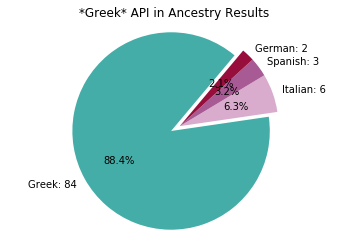

In [51]:
text = '*Greek* API in Ancestry Results'

labels = ['Greek: 84', 'Italian: 6', 'Spanish: 3', 'German: 2']
sizes = [84, 6, 3, 2]
explode = [0.1, 0, 0, 0]
colors = ['#45ada8', '#d9acce', '#a75a94', '#970e3c']

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, 
       autopct='%1.1f%%', startangle=50)
ax.axis('equal')

plt.title(text)
plt.savefig(f'plots/{text}.png')